In [207]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [209]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [205]:
df = pima.iloc[1:].reset_index(drop=True)

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [185]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [187]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [189]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)



In [191]:
print(X_train.head())  # Check if it has column names as values
print(X_train.dtypes)  # Check the data types of columns


y_train

    pregnant insulin   bmi age glucose  bp pedigree
695        7     480  30.4  43     142  90    0.128
119        4      51  23.2  21      99  76    0.223
135        2     140  33.8  31     125  60    0.088
675        6       0  30.9  31     195  70    0.328
326        1     156  35.1  30     122  64    0.692
pregnant    object
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree    object
dtype: object


695    1
119    0
135    0
675    1
326    1
      ..
321    1
581    0
121    0
238    1
681    1
Name: label, Length: 576, dtype: object

In [193]:
df = pd.read_csv("diabetes.csv", header=0)  # Ensure headers are correctly set


In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])  # Convert categorical values to numbers


In [196]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Fill missing values


In [197]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [198]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [199]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[125,   0],
       [ 67,   0]], dtype=int64)

NameError: name 'Text' is not defined

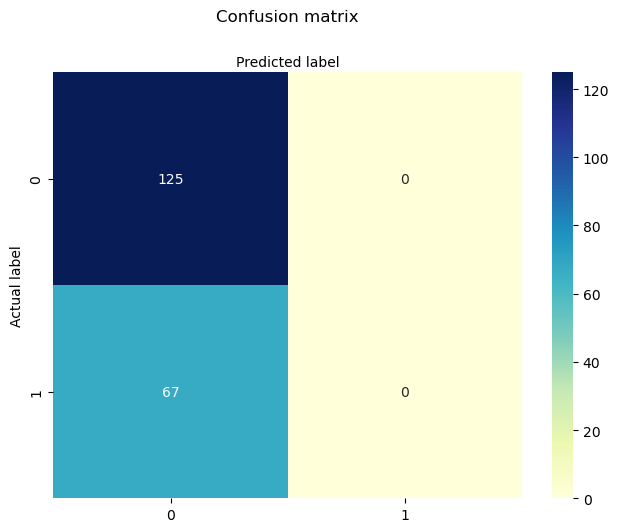

In [200]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');